# *Machine Learning Lab Assignment - 5b*

---

Name: Sri Sai Vijaya Aditya Nittala\
Roll No.: 177163\
Section: A\
Handwritten digit recognition using Convolutional Neural Networks

In [ ]:
## MOUNTING GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## IMPORTING RELEVANT LIBRARIES
import pandas as pd
import numpy as np
from sklearn import preprocessing
import json
import matplotlib.pyplot as plt
from sklearn import model_selection

In [ ]:
## IMPORTING RELEVANT PACKAGES FOR THE DATASET AS WELL AS THE LAYERS FOR THE CNN MODEL
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Sample of images from the MNIST Dataset : 


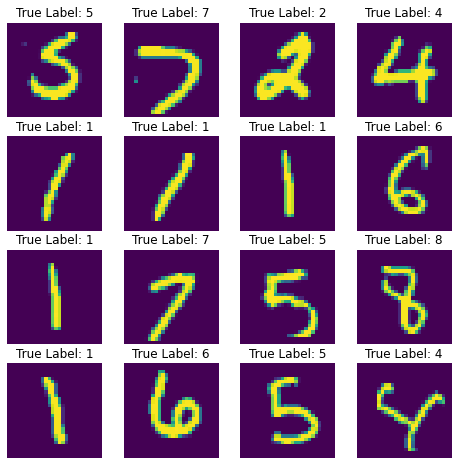

In [ ]:
## LOADING TRAINING DATA 
data = pd.read_csv('/content/drive/MyDrive/mnist.csv')
y = np.array(data['label'])
X = np.array(data.drop(['label'], axis = 1))

## SPLITTING MAIN DATASET INTO TRAINING AND TESTING DATASETS
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

## PRINTING IMAGES FROM THE MNIST DATASET
print("Sample of images from the MNIST Dataset : ")
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    r = np.random.randint(X_train.shape[0])   ## PICK A RANDON IMAGE TO SHOW
    plt.title('True Label: '+ str(y_train[r])) ## PRINT LABEL
    plt.imshow(X_train[r].reshape(28, 28))     ## PRINT IMAGE
plt.show()

In [ ]:
## NORMALIZING THE PIXEL VALUES FOR TRAINING DATA
X_train = X_train / 255

## CONVERTING TARGET VALUE TO ONE-HOT ENCODED FORM
X_train = np.array(X_train)
b = np.zeros((y_train.size, y_train.max()+1))
b[np.arange(y_train.size), y_train] = 1
y_train = np.array(b)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
print("y_train shape (after one-hot encoding) : {}".format(y_train.shape))


y_train shape (after one-hot encoding) : (33600, 10)


In [ ]:
## NORMALIZING THE PIXEL VALUES FOR TESTING DATA
X_test = X_test / 255

## CONVERTING TARGET VALUE TO ONE-HOT ENCODED FORM
X_test = np.array(X_test)
b1 = np.zeros((y_test.size, 10))
b1[np.arange(y_test.size), y_test] = 1
y_test = np.array(b1)

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print("y_test shape (after one-hot encoding) : {}".format(y_test.shape))

y_test shape (after one-hot encoding) : (8400, 10)


In [ ]:
num_classes = y_train.shape[1]
print("Number of classes : {}".format(num_classes))

Number of classes : 10


In [ ]:
## CREATE MODEL AND COMPILE
def baseline_model():
    ## CREATE MODEL
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    ## COMPILE MODEL
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
## SPLITTING INTO VALIDATION SET
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test, y_test, test_size=0.1)

In [ ]:
## BUILDING THE MODEL
model = baseline_model()
## TRAINING THE MODEL
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
168/168 [==============================] - 16s 96ms/step - loss: 0.3296 - accuracy: 0.9071 - val_loss: 0.1426 - val_accuracy: 0.9536
Epoch 2/10
168/168 [==============================] - 16s 95ms/step - loss: 0.1043 - accuracy: 0.9689 - val_loss: 0.0830 - val_accuracy: 0.9774
Epoch 3/10
168/168 [==============================] - 16s 94ms/step - loss: 0.0714 - accuracy: 0.9781 - val_loss: 0.0599 - val_accuracy: 0.9845
Epoch 4/10
168/168 [==============================] - 16s 93ms/step - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.0535 - val_accuracy: 0.9905
Epoch 5/10
168/168 [==============================] - 16s 93ms/step - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.0546 - val_accuracy: 0.9845
Epoch 6/10
168/168 [==============================] - 16s 93ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.0447 - val_accuracy: 0.9857
Epoch 7/10
168/168 [==============================] - 16s 93ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0437 - val_accuracy:

Training and Cross-validation accuracy with respect to epochs : 


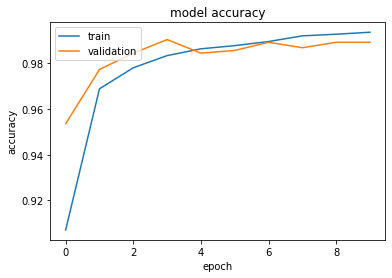

In [ ]:
print("Training and Cross-validation accuracy with respect to epochs : ")
## ACCURACY VS ITERATIONS GRAPH
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model loss with respect to epochs : 


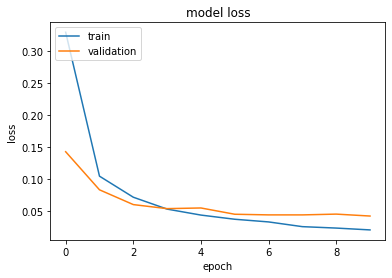

In [ ]:
print("Model loss with respect to epochs : ")
## LOSS VS ITERATIONS GRAPH
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
## EVALUATING THE MODEL USING TEST DATA
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=200)
print("\nTest loss : {}\tTest Accuracy : {}".format(results[0], results[1]))
## PRINTING WEIGHTS
print("\nWeights : {}".format(model.get_weights()))

Evaluate on test data
38/38 [==============================] - 1s 27ms/step - loss: 0.0471 - accuracy: 0.9865

Test loss : 0.04712556675076485	Test Accuracy : 0.9865079522132874

Weights : [array([[[[ 8.04903209e-02,  3.58311199e-02, -1.21079206e-01,
          -8.20335746e-02,  5.00785187e-02, -1.40752092e-01,
           6.75003156e-02, -7.89242536e-02, -8.68643522e-02,
          -2.46536791e-01,  1.87083445e-02,  1.09414859e-02,
          -2.45625034e-01, -1.19007915e-01, -1.41105533e-01,
          -2.93295234e-01,  8.91771689e-02, -1.07493453e-01,
          -2.83506244e-01,  8.89354497e-02, -1.54868662e-01,
           7.94681087e-02,  7.12729096e-02,  1.09676853e-01,
           1.22253887e-01,  1.70896381e-01,  1.38106704e-01,
           2.59836018e-02,  4.48092669e-02,  7.59988185e-03,
           4.38960902e-02,  9.46552306e-03]],

        [[-6.34383559e-02,  4.13288064e-02, -3.89649644e-02,
          -1.52956426e-01, -1.68809965e-01, -1.67483941e-01,
           1.36104614e-01, -1.5